In [ ]:
#출처(동영상 강의 내용을 주피터노트북에 데이터를 가져와서 분석) : https://www.kaggle.com/corazzon/how-to-use-pandas-filter-in-survey-eda

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

plt.style.use("seaborn-whitegrid")

In [29]:
raw = pd.read_csv(r"kaggle_survey_2020_responses.csv", low_memory=False)
raw.shape

(20037, 355)

In [30]:
raw.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
question = raw.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [32]:
answer = raw.drop([0])
answer

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [33]:
q1_cols = answer["Q1"].value_counts().sort_index().index.tolist()
q1_cols

['18-21',
 '22-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-69',
 '70+']

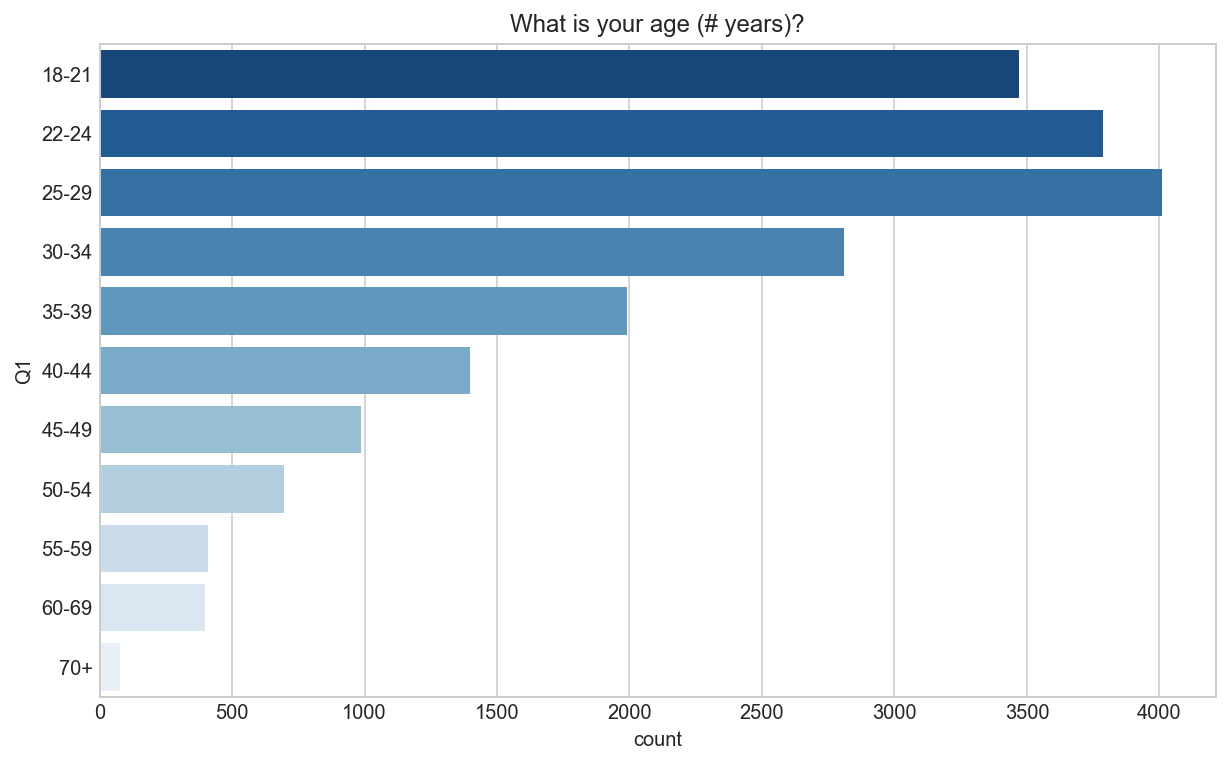

In [34]:
def show_countplot_by_qno(qno,fsize=(10,6), order =None):
    if not order:
        order = answer[qno].value_counts().index
    
    plt.figure(figsize=fsize)
    sns.countplot(data=answer, y=qno, 
                  palette="Blues_r",
                 order = order ).set_title(question[qno])

show_countplot_by_qno("Q1", order=q1_cols)

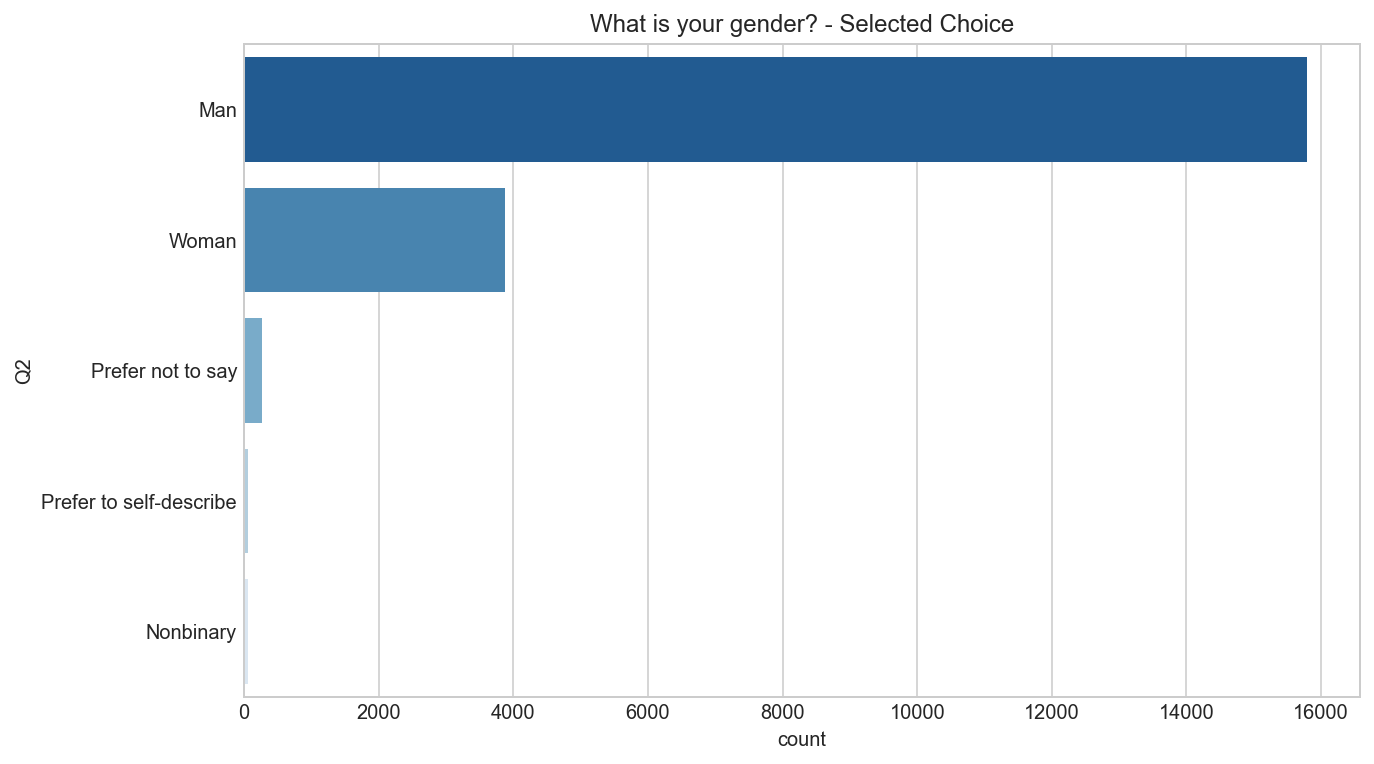

In [35]:
show_countplot_by_qno("Q2")

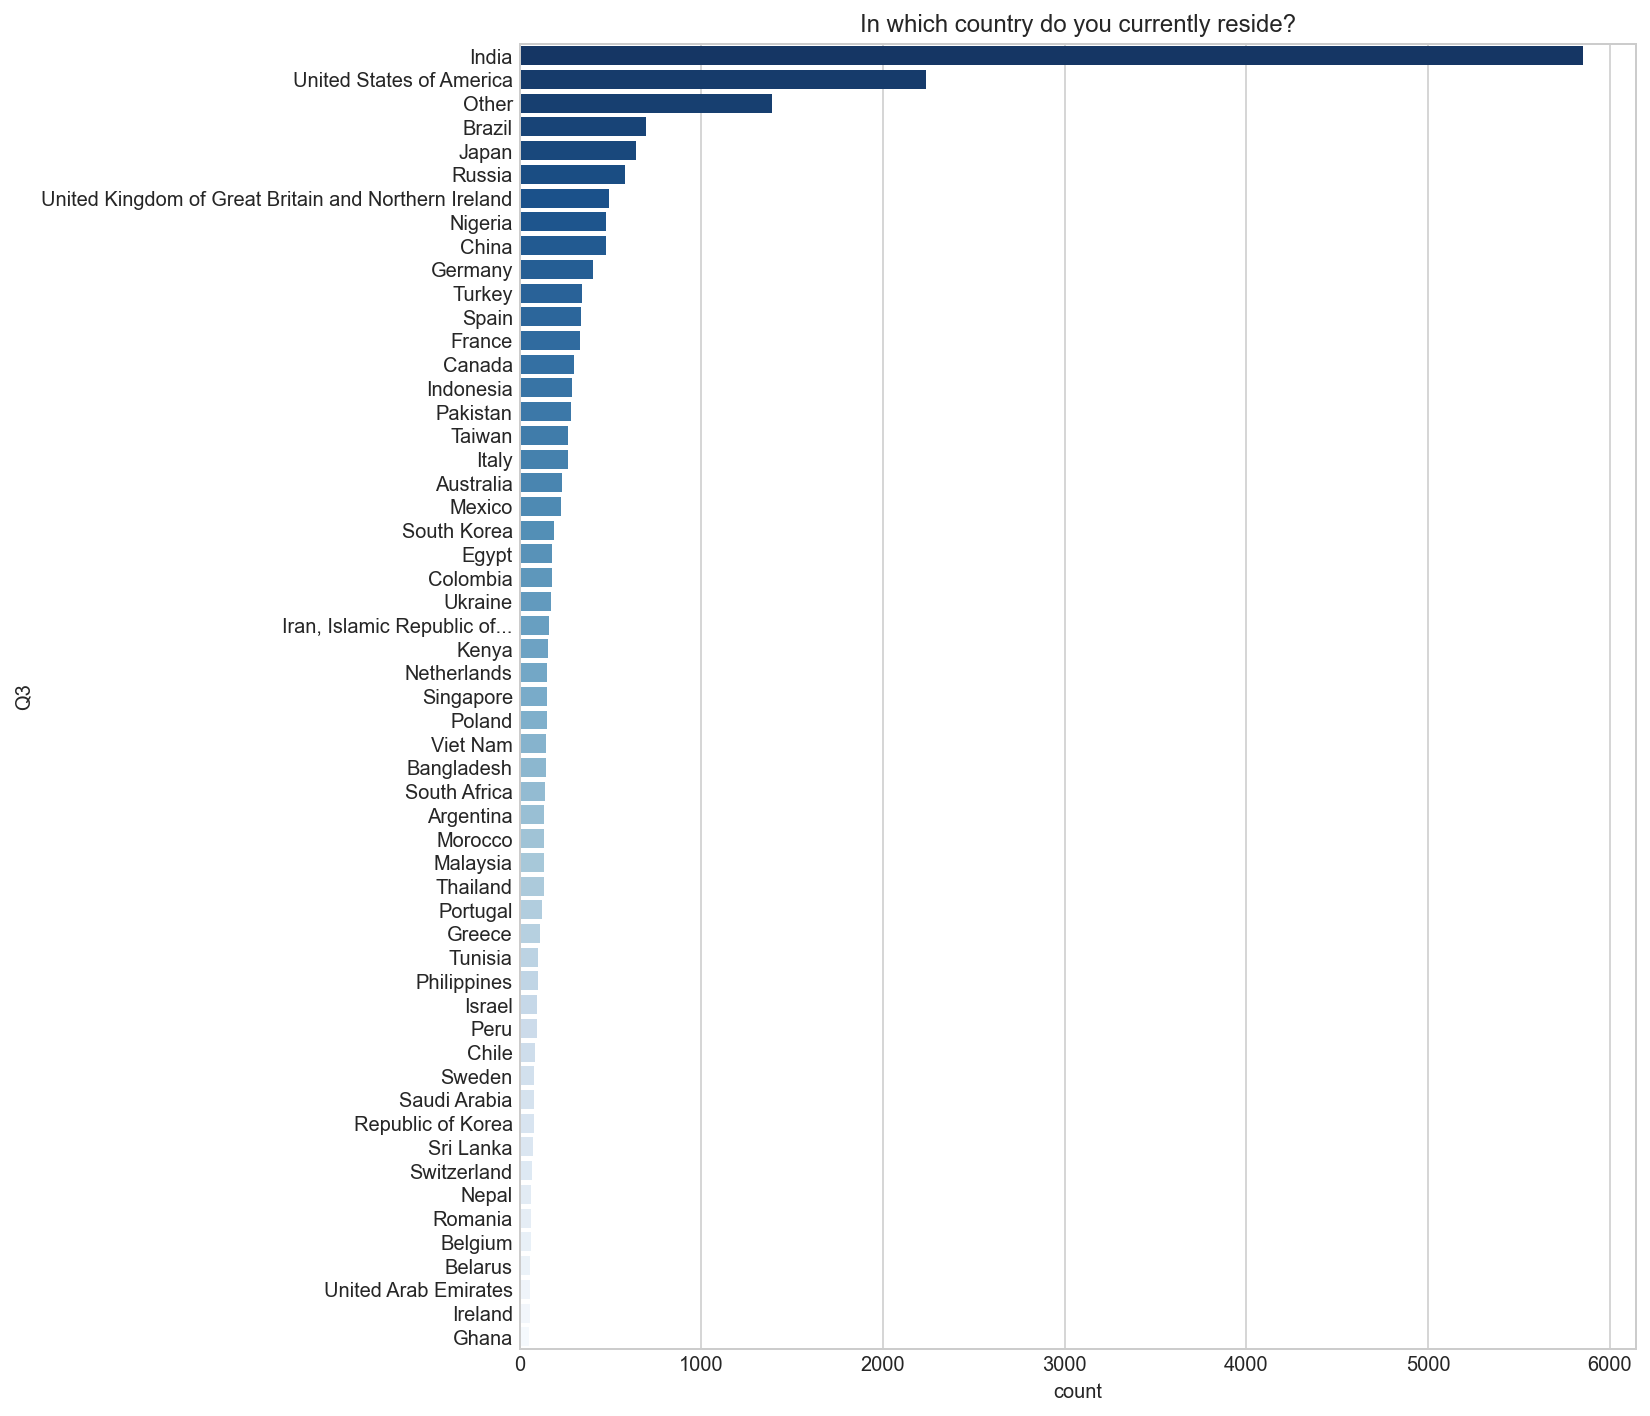

In [36]:
show_countplot_by_qno("Q3",fsize=(10,12))

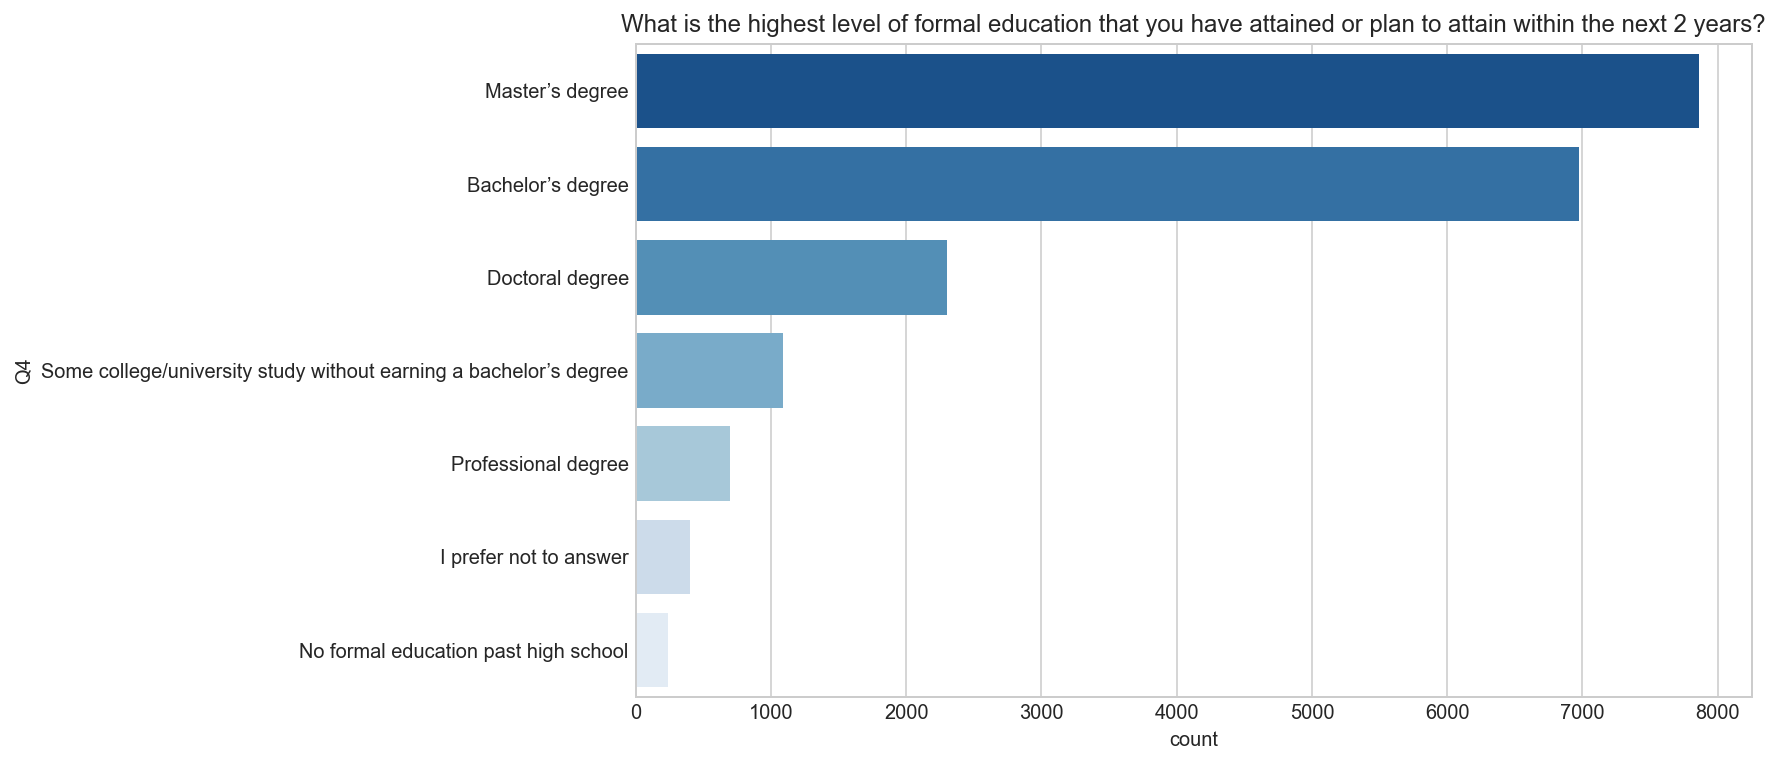

In [37]:
show_countplot_by_qno("Q4")

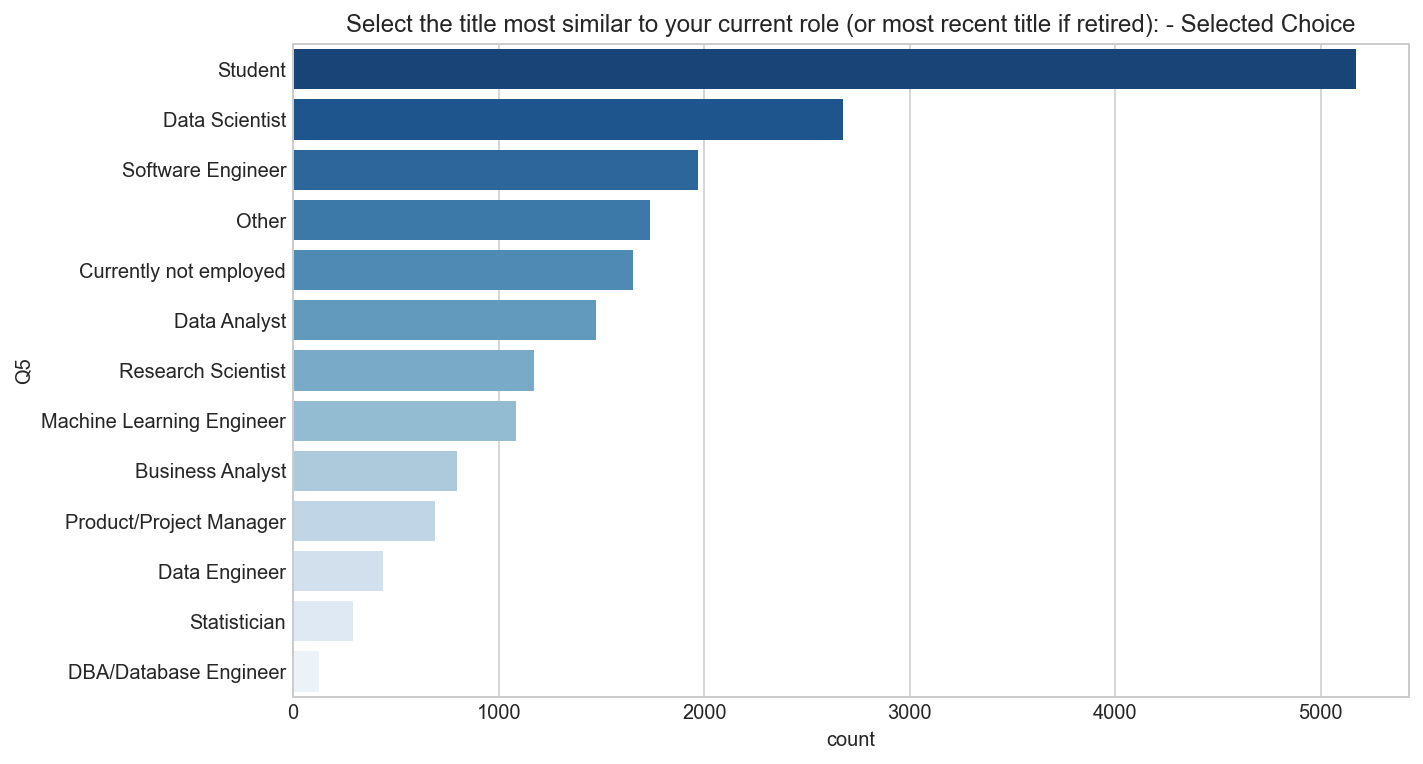

In [38]:
show_countplot_by_qno("Q5")

In [43]:
q6_cols = ['I have never written code','< 1 years','1-2 years','3-5 years','5-10 years','10-20 years','20+ years']

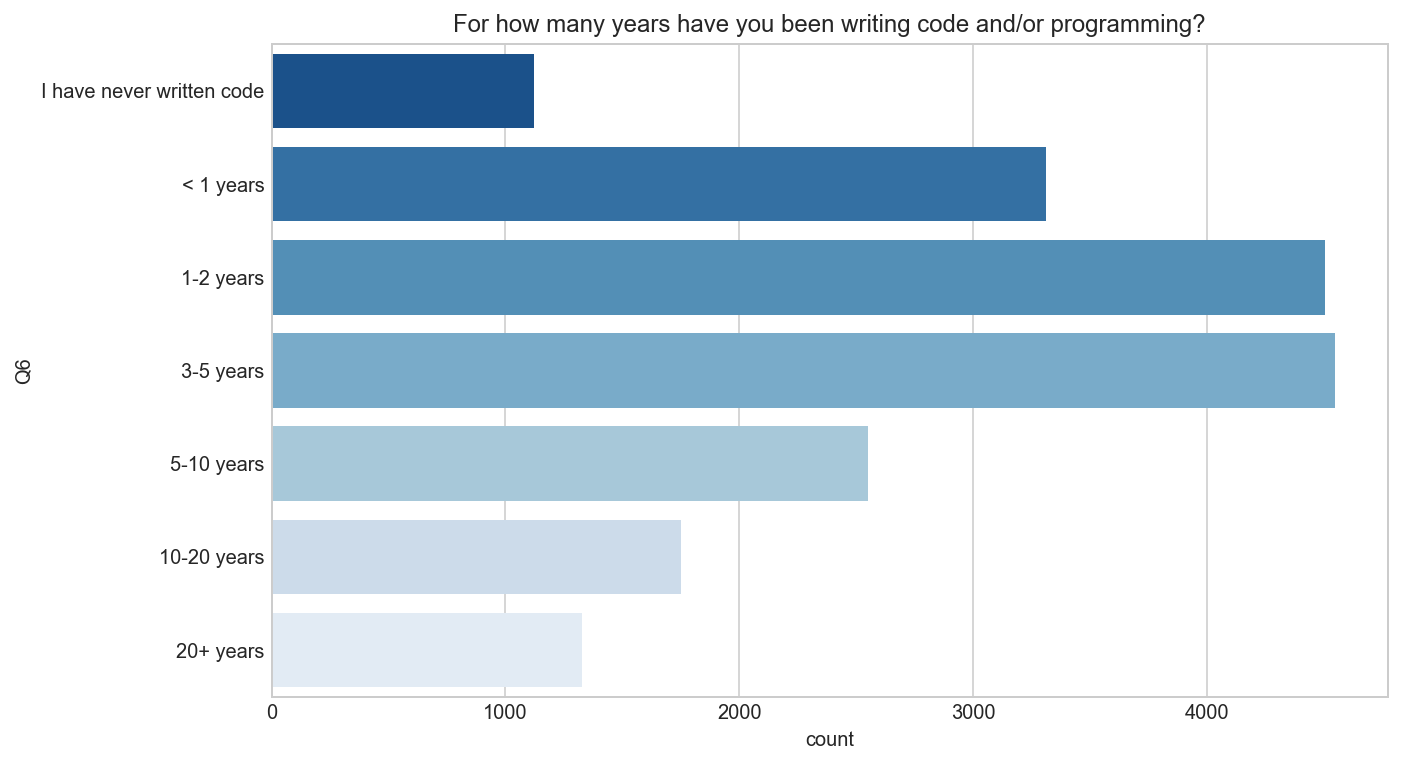

In [44]:
show_countplot_by_qno("Q6", order = q6_cols)

In [45]:
#7번 부터는 asnwer형태가 다르다.

In [85]:
question.filter(regex = "Q7")[0].split("-")[0]

'What programming languages do you use on a regular basis? (Select all that apply) '

In [55]:
#filter 와 regex를 이용하여 Q7 가져오기!!!!!!
answer_Q7 = answer.filter(regex="Q7")
answer_Q7

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,Python,NaN,SQL,C,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
answer_Q7.isnull().sum()

Q7_Part_1      4506
Q7_Part_2     15759
Q7_Part_3     12501
Q7_Part_4     16721
Q7_Part_5     16209
Q7_Part_6     16669
Q7_Part_7     17041
Q7_Part_8     19774
Q7_Part_9     19838
Q7_Part_10    18260
Q7_Part_11    17819
Q7_Part_12    19830
Q7_OTHER      18091
dtype: int64

In [59]:
answer_Q7.notnull().sum()

Q7_Part_1     15530
Q7_Part_2      4277
Q7_Part_3      7535
Q7_Part_4      3315
Q7_Part_5      3827
Q7_Part_6      3367
Q7_Part_7      2995
Q7_Part_8       262
Q7_Part_9       198
Q7_Part_10     1776
Q7_Part_11     2217
Q7_Part_12      206
Q7_OTHER       1945
dtype: int64

In [63]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
freq,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945


In [64]:
answer_Q7_desc.loc[["count","top"]]

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other


<AxesSubplot:ylabel='top'>

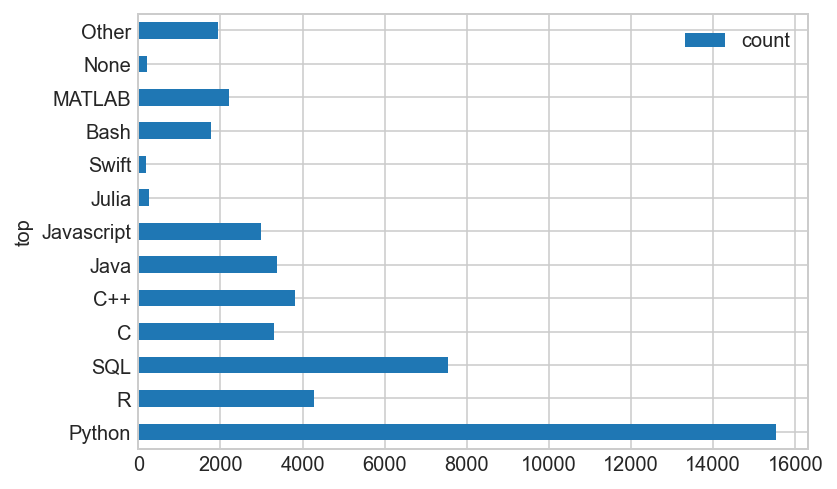

In [84]:
answer_Q7_desc.loc[["count","top"]].T.set_index("top").plot.barh()

In [79]:
anwer_Q7_count =  answer_Q7_desc.loc[["count","top"]].T
anwer_Q7_count = anwer_Q7_count.set_index("top") #set_index("top")를 이용하여 기존에 있는 인덱스를 top에 있는 값들로 바꾸어 준다!!!!!
anwer_Q7_count = anwer_Q7_count.sort_values("count", ascending==False)
anwer_Q7_count

,count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


In [100]:
#Q7의 title을 가져와보자!!
Q7_title = question.filter(regex = "Q7")[0].split("-")[0]
Q7_title

'What programming languages do you use on a regular basis? (Select all that apply) '

Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply) ')

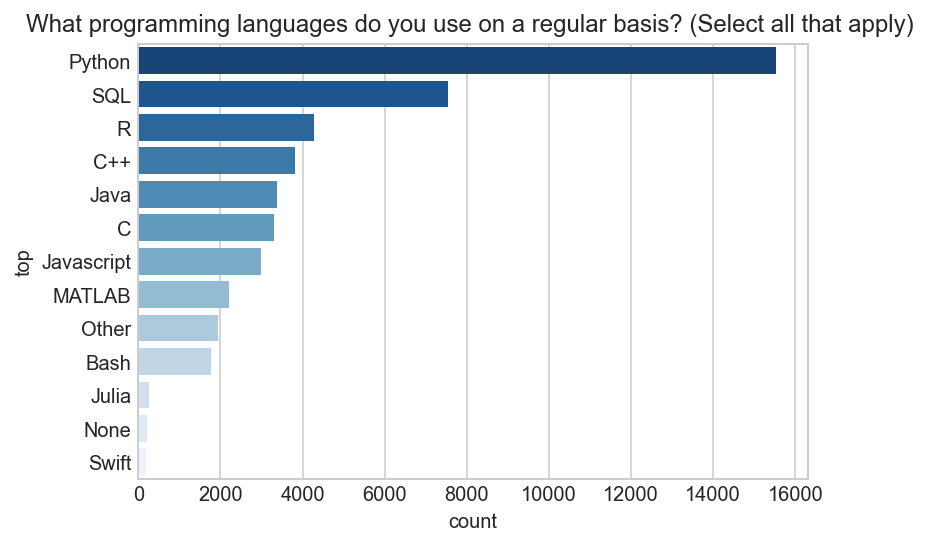

In [101]:
sns.barplot(data=anwer_Q7_count, y=anwer_Q7_count.index, x="count", palette = "Blues_r").set_title(Q7_title)

In [151]:
#함수를 이용하여 Q7부터 question.index가 없는 것에 대한 title를 가져오자!
def get_question_title_by_qno(qno):
    if qno in question.index:
        return question[qno]
    else:
        q_no = question.filter(regex = qno)[0].split("-")[0]
        return q_no
    
get_question_title_by_qno("Q7")

'What programming languages do you use on a regular basis? (Select all that apply) '

In [152]:
#함수를 이용하여 Q7부터 데이터를 가져와서 표현하자!!!
def get_multiple_choice_answer_by_qno(qno):
    df_answer = answer.filter(regex=qno)
    answer_desc = df_answer.describe()
    answer_desc = answer_desc.loc[["count","top"]].T
    answer_desc = answer_desc.set_index("top")
    answer_desc = answer_desc.sort_values("count",ascending = False)
    return answer_desc

get_multiple_choice_answer_by_qno("Q10")

,count
top,
Colab Notebooks,6329
Kaggle Notebooks,5992
None,5282
Binder / JupyterHub,2072
Google Cloud Datalab Notebooks,1231
Google Cloud AI Platform Notebooks,1218
Azure Notebooks,857
IBM Watson Studio,846
Amazon Sagemaker Studio,497


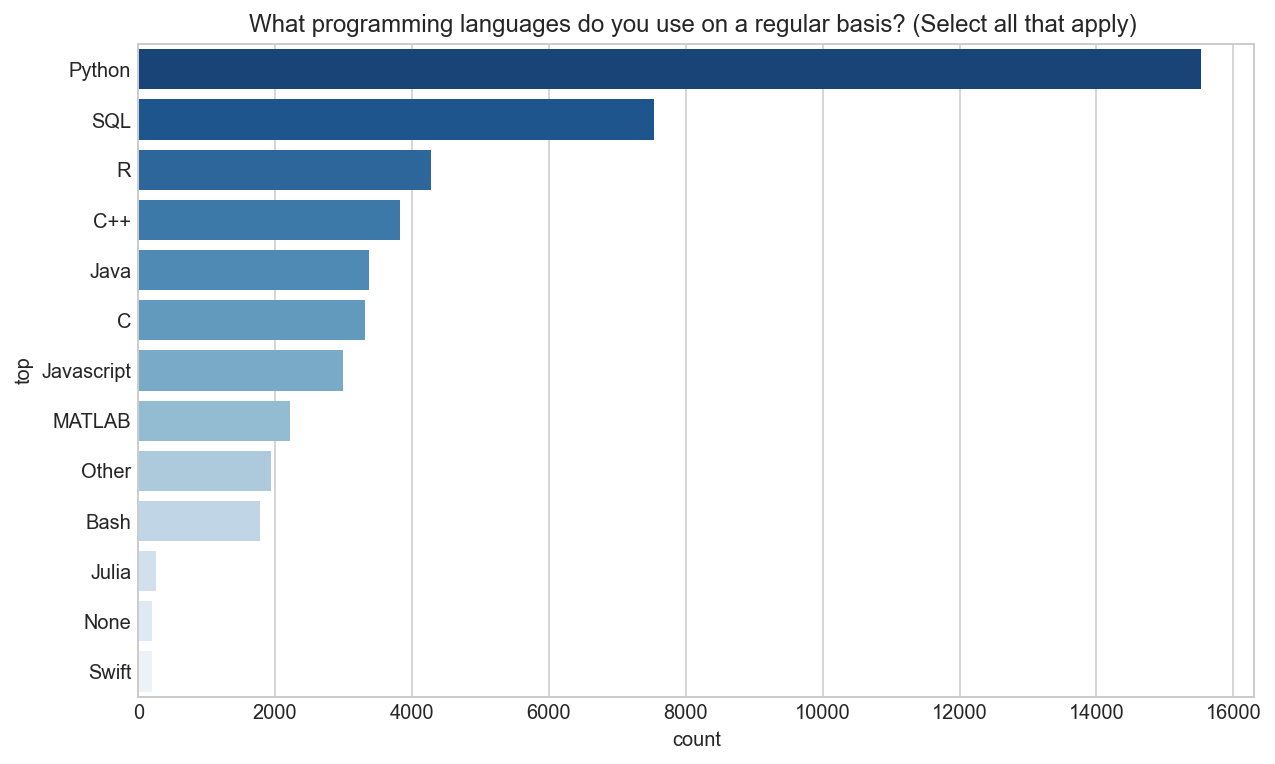

In [158]:
#최종적으로 위에 것들을 합쳐서 막대그래프로 그려보자!!!

def show_multiple_choice_bar_plot_by_qno(qno):
    multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)
    
    plt.figure(figsize=(10,6))
    sns.barplot(data=multiple_choice_answer, 
                y=multiple_choice_answer.index,
                x="count", 
                palette="Blues_r").set_title(get_question_title_by_qno(qno))
show_multiple_choice_bar_plot_by_qno("Q7")